
**TASK -1**

**Cat and Dog Image Classifier**

Develop an image classification model to distinguish between images of cats and dogs using data science techniques in Python.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 117ms/step - loss: 1.4866 - accuracy: 0.5860 - val_loss: 0.6384 - val_accuracy: 0.6190
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5691 - accuracy: 0.7103 - val_loss: 0.5108 - val_accuracy: 0.7484
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5150 - accuracy: 0.7561 - val_loss: 0.5057 - val_accuracy: 0.7516
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4298 - accuracy: 0.8051 - val_loss: 0.4646 - val_accuracy: 0.7842
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3597 - accuracy: 0.8417 - val_loss: 0.4587 - val_accuracy: 0.7850
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2892 - accuracy: 0.8767 - val_loss: 0.4402 - val_accuracy: 0.8004
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2184 - accuracy: 0.9144 - val_loss: 0.5576 - val_ac

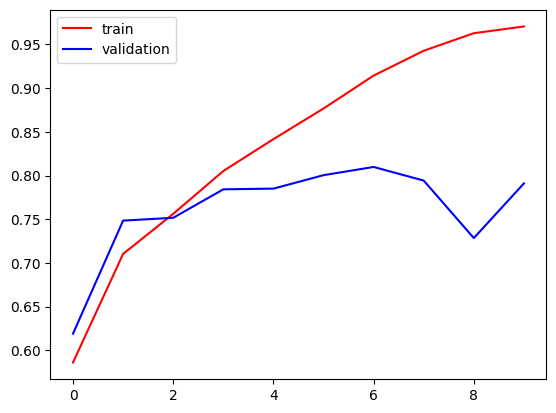

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

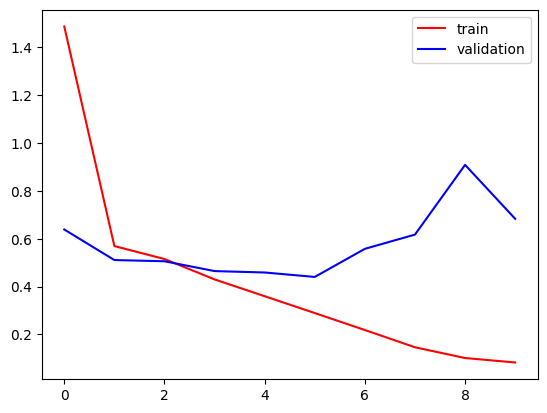

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

 form training accuracy.validation accuracy & training loss,validation loss graph their is overfiting
#### ways to reduce overfitting
##### L1/L2 Regularizer
##### Dropout
##### Batch Norm


In [20]:
import cv2

In [21]:
test_img = cv2.imread('/content/cat.jpg')

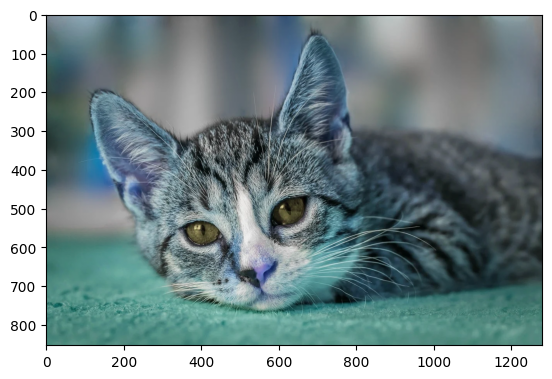

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(853, 1280, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 407ms/step


array([[0.]], dtype=float32)

In [27]:
import cv2

In [28]:
test_img = cv2.imread('/content/dog.jpg')

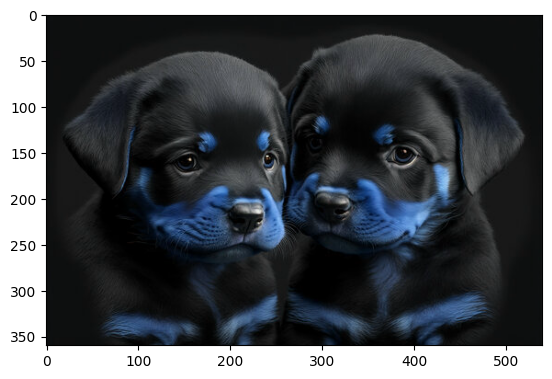

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(360, 540, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

#### As you can see  where the output is 0 is a cat and output 1 is a dog as per the input .